# Импорт библиотек и чтение файла
#### Цель работы
Изучение связи между признаками двумерного набора данных, визуализация данных.

#### Задание
1. Загрузить датасет с помощью библиотеки pandas. Оценить его через info и describe. Выполнить предварительную обработку данных, если это необходимо.
2. Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными ветами).
3. Постройте гистограммы для каждого числового признака, подберите оптимальное количество bins, сделайте выводы по полученными гистограммам.
4. Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить heatmap (тепловую карту корреляции). Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что такое корреляция и ковариация.
5. Постройте графики по заданию в варианте. Выполните интерпретацию, что вы видите на этих графиках
6. Выполните минимум один любой график типа hexagonal binning plot. Сделайте выводы.
7. Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.
8. Добавьте категорию по любому числовому столбцу (например, уровень зарплаты - высокий, низкий, средний. Сделайте boxplot по этому числовому столбцу по каждой новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).
9. Выполните ещё минимум 2 графика boxplot по другим категориям (например, зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для каждой категории на ном графике). Используйте для построения графиков разные библиотеки (минимум 2). Сделайте вывод.
10. Сделайте общие выводы по работе. В том числе с качественной интерпретацией.


## Описание предметной области
**Вариант 5** <br>
Датасет movie2.csv содержит информацию о фильмах и/или сериалах, включая:

* title — название произведения;
* release_year — год выхода;
* score — пользовательская оценка (скорее всего, с IMDb);
* number_of_votes — количество голосов;
* duration — продолжительность в минутах;
* main_genre — основной жанр;
* main_production — страна (код ISO, например US, GB, IN, UA).
<br> Такой набор признаков подходит для анализа кинематографических данных: сравнения оценок, популярности по странам, продолжительности и жанрам.

## 1. Подключение библиотек и загрузка данных

В этой части мы импортируем необходимые библиотеки для анализа и визуализации, а также загрузим CSV-файл `movies2.csv`. Работа будет осуществляться в pandas для обработки таблиц, seaborn и matplotlib — для визуализаций.


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/movies2.csv', sep=';')
df.head()


,title,release_year,score,number_of_votes,duration,main_genre,main_production
0,David Attenborough: A Life on Our Planet,2020.0,9.0,31180.0,83,documentary,GB
1,Inception,2010.0,8.8,2268288.0,148,scifi,GB
2,Forrest Gump,1994.0,8.8,1994599.0,142,drama,US
3,Anbe Sivam,2003.0,8.7,20595.0,160,comedy,IN
4,Bo Burnham: Inside,2021.0,8.7,44074.0,87,comedy,US


## 2. Первичный осмотр данных и предварительная обработка

Здесь мы изучаем структуру данных: какие столбцы присутствуют, их типы, наличие пустых значений и дубликатов. Это необходимо, чтобы понимать качество данных и принять решения о приведении типов и очистке.


In [161]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            384 non-null    object 
 1   release_year     387 non-null    float64
 2   score            386 non-null    float64
 3   number_of_votes  388 non-null    float64
 4   duration         389 non-null    int64  
 5   main_genre       389 non-null    object 
 6   main_production  388 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 21.4+ KB


,release_year,score,number_of_votes,duration
count,387.000000,386.000000,3.880000e+02,389.000000
mean,2010.976744,7.512176,1.391523e+05,123.352185
std,10.805726,0.443870,2.365279e+05,28.304800
min,1954.000000,6.900000,1.013900e+04,28.000000
25%,2007.500000,7.100000,2.055375e+04,104.000000
50%,2014.000000,7.400000,4.606950e+04,122.000000
75%,2018.000000,7.800000,1.551585e+05,139.000000
max,2022.000000,9.000000,2.268288e+06,229.000000


Далее проверим количество пропусков и дубликатов, чтобы оценить необходимость очистки.

In [162]:
missing = df.isna().sum()
duplicates = df.duplicated().sum()
missing, duplicates

(title              5
 release_year       2
 score              3
 number_of_votes    1
 duration           0
 main_genre         0
 main_production    1
 dtype: int64,
 np.int64(2))

В датафрейме есть пропуски и 2 явных дубликата, их следует устранить

In [163]:
df_clean = df.dropna()

In [164]:
print(df_clean.isna().sum(), '\n')

title              0
release_year       0
score              0
number_of_votes    0
duration           0
main_genre         0
main_production    0
dtype: int64 



In [165]:
df_clean = df_clean.drop_duplicates().reset_index(drop = True)
print(f"Количество дубликатов: {df_clean.duplicated().sum()}")

Количество дубликатов: 0


Теперь проверим неявные дубликаты


In [166]:
print('main_genre', df['main_genre'].unique())
print('main_production', df['main_production'].unique())

main_genre ['documentary' 'scifi' 'drama' 'comedy' 'western' 'action' 'crime'
 'thriller' 'war' 'fantasy' 'romance' 'horror' 'musical' 'animation'
 'sports' 'COMEDY' 'dramaa']
main_production ['GB' 'US' 'IN' 'UA' 'CD' 'TR' 'ES' 'AU' 'JP' 'ZA' 'HK' 'DE' 'KR' 'CA'
 'BE' 'NO' 'NZ' 'MX' 'FR' 'MW' 'TH' 'AR' 'PS' nan 'HU' 'IT' 'CN' 'PL' 'KH'
 'IE' 'BR' 'XX' 'LT' 'NL' 'DK' 'ID']


Неявные дубликаты найдены в столбце main_genre

In [167]:
df_clean['main_genre'] = df['main_genre'].replace('COMEDY', 'comedy')
df_clean['main_genre'] = df['main_genre'].replace('dramaa', 'drama')
print('main_genre', df_clean['main_genre'].unique())

main_genre ['documentary' 'scifi' 'drama' 'comedy' 'western' 'action' 'crime'
 'thriller' 'war' 'fantasy' 'romance' 'horror' 'musical' 'animation'
 'sports' 'COMEDY']


Все неявные дубликаты устранены

На основании результатов приведём ключевые столбцы к корректным типам: `release_year`, `score`, `number_of_votes`. Удалим полностью дублирующиеся строки и удалим строки, у которых отсутствуют критические поля (`release_year`, `main_genre`, `main_production`), так как эти поля важны для выполнения заданий варианта.

In [168]:
df.dtypes

title               object
release_year       float64
score              float64
number_of_votes    float64
duration             int64
main_genre          object
main_production     object
dtype: object

In [169]:
df_clean['release_year'] = pd.to_datetime(df_clean['release_year'], format='%Y')
df_clean['number_of_votes'] = df_clean['number_of_votes'].astype(int)
print(df_clean.dtypes)


title                      object
release_year       datetime64[ns]
score                     float64
number_of_votes             int64
duration                    int64
main_genre                 object
main_production            object
dtype: object


**Интерпретация:**  
Мы устранили дубликаты и строки с отсутствующими критическими полями. После приведения типов ключевые числовые столбцы готовы к анализу.

## 3. Построение гистограммы

<Figure size 1200x800 with 0 Axes>

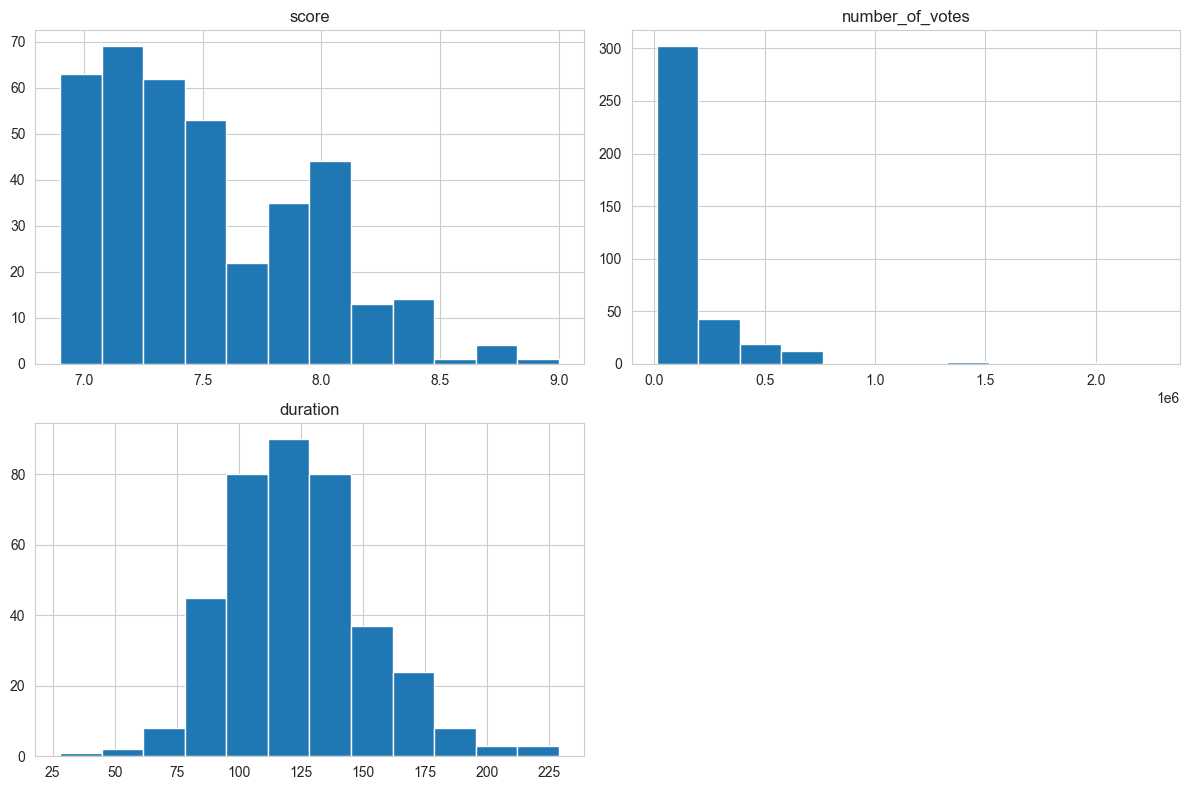

In [170]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(12,8))
df_clean[num_cols].hist(bins=12, figsize=(12,8))
plt.tight_layout()

Гистограммы позволяют оценить, насколько распределения симметричны, есть ли длинные хвосты и выбросы. Для более детального изучения попарных зависимостей используем `pairplot` на случайной выборке (чтобы визуализация оставалась читаемой при большом числе строк).

## 4. Построение матрицы рассеивания

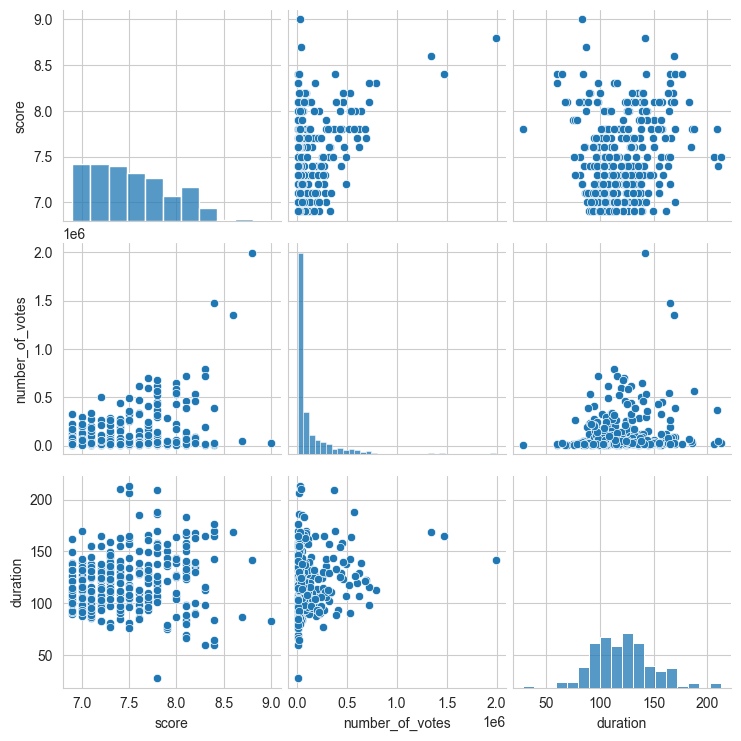

In [171]:
sample = df_clean.sample(n=min(300, len(df)), random_state=1)
sns.pairplot(sample[['score','number_of_votes', 'duration']])

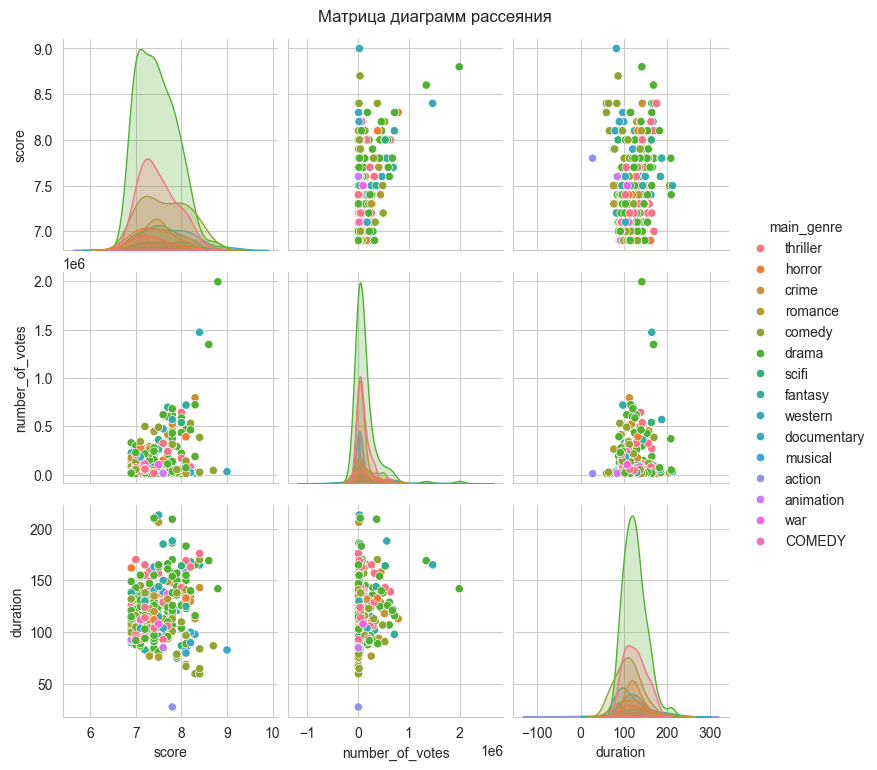

In [172]:
sns.pairplot(sample[['score', 'number_of_votes', 'duration', 'main_genre']],
             hue='main_genre')
plt.suptitle("Матрица диаграмм рассеяния", y=1.02)
plt.show()

Матрица попарных диаграмм помогает увидеть возможные нелинейные связи и аномальные точки. Для количественной оценки зависимости построим тепловую карту корреляций между этими переменными.

## 5. Кореляция и ковариация


In [173]:
# Матрица корреляций
corr_matrix = df_clean[['score', 'number_of_votes', 'release_year']].corr()
print("Матрица корреляции:\n")
print(corr_matrix, "\n")

# Матрица ковариаций
cov_matrix = df_clean[['score', 'number_of_votes', 'release_year']].cov()
print("Матрица ковариации:\n")
print(cov_matrix)


Матрица корреляции:

                    score  number_of_votes  release_year
score            1.000000         0.347352     -0.152454
number_of_votes  0.347352         1.000000     -0.212221
release_year    -0.152454        -0.212221      1.000000 

Матрица ковариации:

                        score  number_of_votes  release_year
score            1.980996e-01     3.634659e+04 -2.326060e+16
number_of_votes  3.634659e+04     5.527182e+10 -1.710339e+22
release_year    -2.326060e+16    -1.710339e+22  1.175121e+35


## 6. Построение heatmap

Text(0.5, 1.0, 'Correlation matrix')

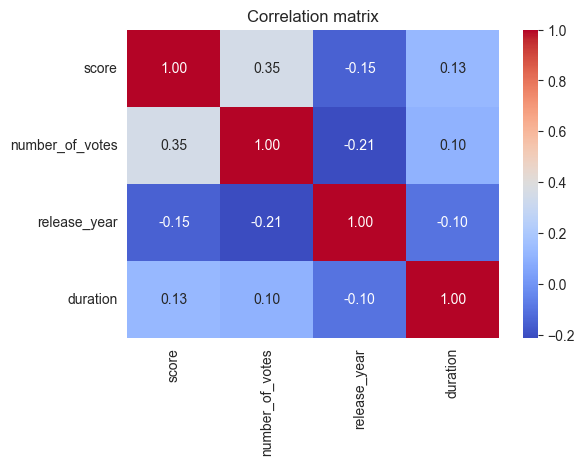

In [174]:
corr = df_clean[['score','number_of_votes', 'release_year' ,'duration']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')

**Интерпретация:**  
Тепловая карта показывает коэффициенты корреляции Пирсона между оценкой, числом голосов и длительностью фильма. Значения близкие к 1 или -1 указывают на сильную линейную связь, близкие к 0 — на её отсутствие. Это важно при построении дальнейших моделей и при поиске причинно-следственных гипотез.

## 7. Выполнение индивидуальных заданий
#### Задание 1 (Seaborn)
**Условие (вариант 5):** Отфильтровать данные — год выхода фильма **с 2020**. По группировке — `main_production` и количество фильмов каждого жанра (`main_genre`) построить диаграмму.  

**Подход:** фильтруем данные по `release_year >= 2020`, группируем по паре (main_production, main_genre), считаем количество записей и строим столбчатую диаграмму с разделением по жанру (hue).  


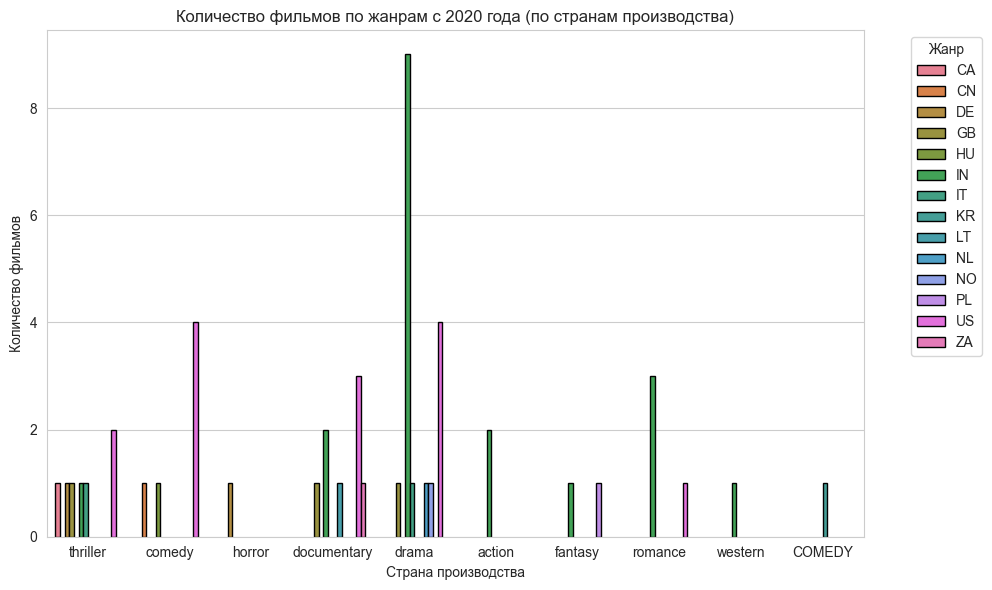

In [175]:
df2020 = df_clean[df_clean["release_year"].dt.year >= 2020]

grouped = (
    df2020.groupby(["main_production", "main_genre"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x="main_genre",
    y="count",
    hue="main_production",
    edgecolor="black"
)

plt.title("Количество фильмов по жанрам с 2020 года (по странам производства)")
plt.xlabel("Страна производства")
plt.ylabel("Количество фильмов")
plt.legend(title="Жанр", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

**Интерпретация результата:**  
На графике видно распределение жанров внутри каждого производителя (страны или студии) для фильмов, выпущенных с 2020 года. Если одна или несколько стран имеют высокие столбцы в определённом жанре, это может указывать на специализацию или тренд в производстве. При анализе стоит обращать внимание на малые объемы (маленькие столбцы), где статистика ненадёжна.

#### Задание 2 (pandas + plot)
**Условие (вариант 5):** Отфильтровать данные и выбрать фильмы с годом выхода **> 2010**. По сводной таблице (`pivot_table`) отобразить среднее количество голосов (`number_of_votes`) по годам. На графике оставить только маркеры в виде ромбов (◈), синие, размер 14.  

**Подход:** используем `pivot_table` для группировки по `release_year` и вычисления среднего `number_of_votes`. Затем строим линейный график и поверх него ставим маркеры ромбом.


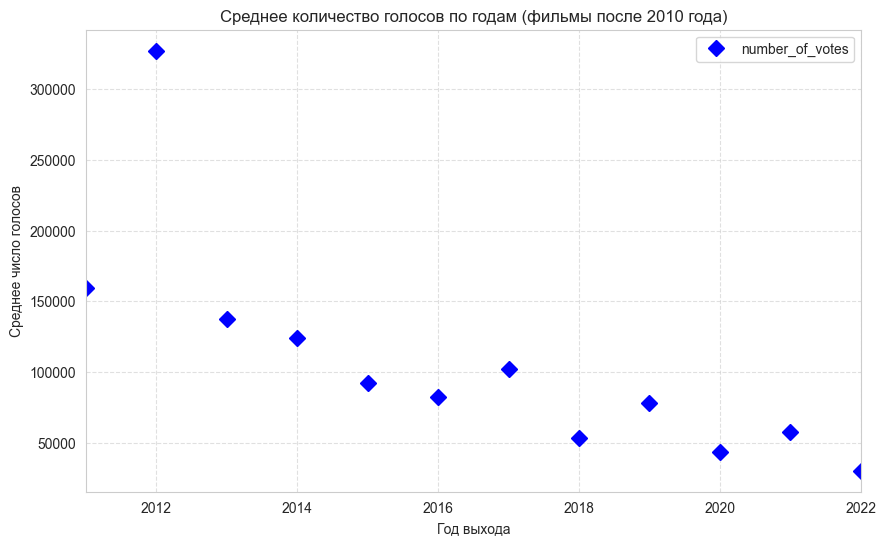

In [176]:
df2010 = df_clean[df_clean["release_year"].dt.year > 2010]

pivot = df2010.pivot_table(
    index="release_year",
    values="number_of_votes",
    aggfunc="mean"
)

pivot.plot(
    marker='D',
    markersize=8,
    linestyle='None',
    color='blue',
    figsize=(10, 6)
)

plt.title("Среднее количество голосов по годам (фильмы после 2010 года)")
plt.xlabel("Год выхода")
plt.ylabel("Среднее число голосов")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**Интерпретация результата:**  
График отображает средний уровень активности зрителей (по числу голосов) для релизов каждого года после 2010. Возрастание средней величины может свидетельствовать о росте интереса к платформам, где оставляют оценки, либо об увеличении доступности критических масс просмотров. Стоит учитывать, что медиана может вести себя иначе при наличии очень популярных фильмов (сильных выбросов по голосам).

#### Задание 3 (Matplotlib)
**Условие (вариант 5):** Построить круговую диаграмму, которая отображает распределение фильмов по годам — отобразить только фильмы **2020 года и выше**.  

**Подход:** агрегируем количество фильмов по `release_year` для `df2020` и строим pie-chart с процентами.


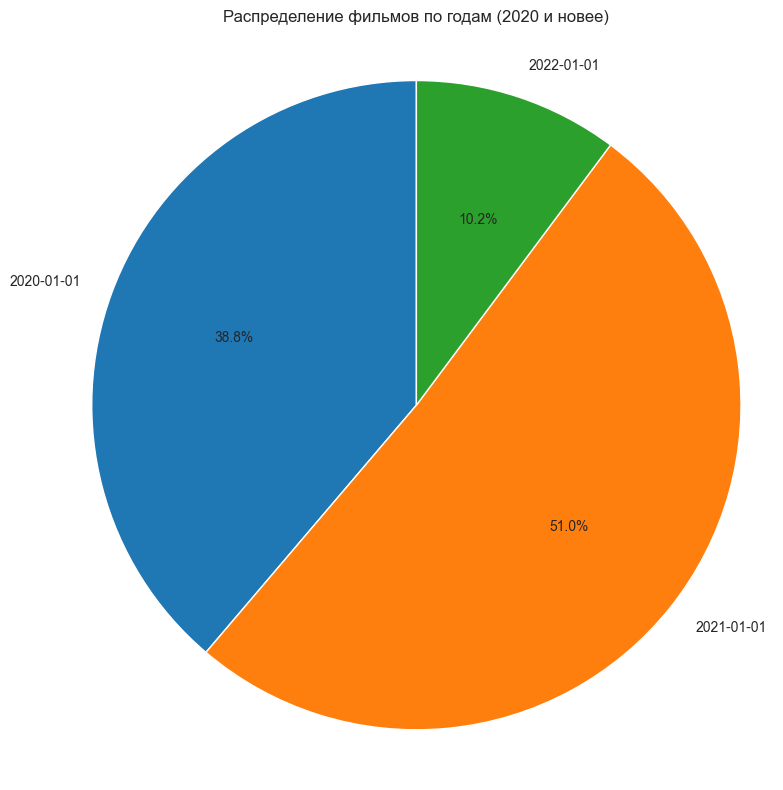

In [177]:
df2020_counts = df2020['release_year'].value_counts().sort_index()
labels = df2020_counts.index.astype(str).tolist()
sizes = df2020_counts.values

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'size':'medium'})
plt.title('Распределение фильмов по годам (2020 и новее)')
plt.axis('equal')
plt.tight_layout()

**Интерпретация результата:**  
Круговая диаграмма показывает относительную долю релизов по годам начиная с 2020. Этот вид графика удобен для демонстрации процентного соотношения, но менее информативен для сравнения мелких отличий между соседними годами.

## 8. Гексагональный график

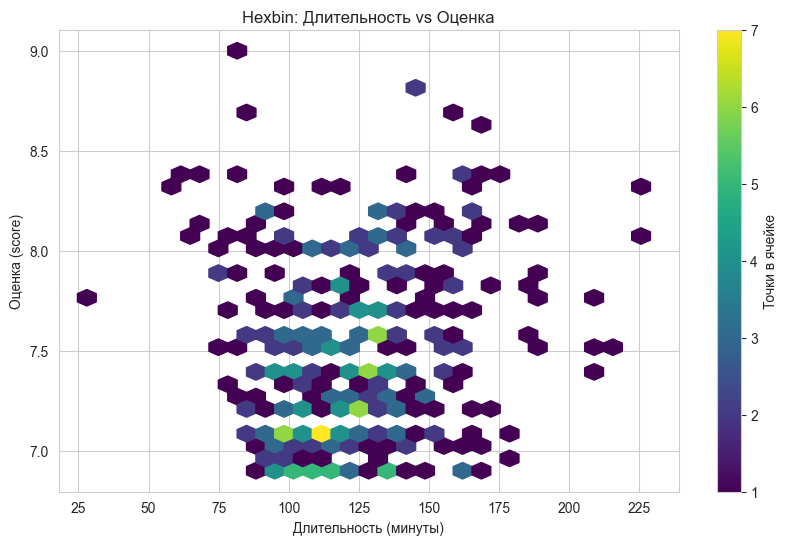

In [178]:
plt.figure(figsize=(10, 6))
plt.hexbin(
    df_clean['duration'],
    df_clean['score'],
    gridsize=30,
    cmap='viridis',
    mincnt=1
)
plt.colorbar(label='Точки в ячейке')
plt.xlabel('Длительность (минуты)')
plt.ylabel('Оценка (score)')
plt.title('Hexbin: Длительность vs Оценка')
plt.show()

## 9. Карта размаха

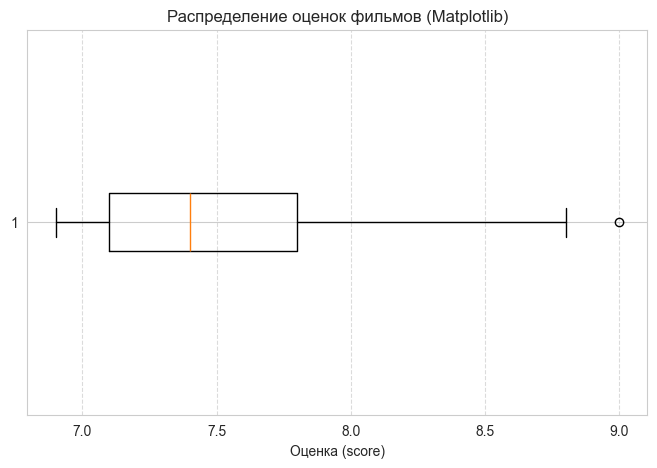

In [179]:
plt.figure(figsize=(8, 5))
plt.boxplot(df_clean['score'], vert=False)
plt.xlabel('Оценка (score)')
plt.title('Распределение оценок фильмов (Matplotlib)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Выводы:
* Медиана оценок находится на уровне ~7.4 балла.
* Выбросы (точки справа от уса) — фильмы с оценкой 9.0, вероятно, культовые или премиальные проекты.
* Нижний ус заканчивается на ~6.9, что указывает на отсутствие массовых фильмов с крайне низкими оценками.


In [180]:
def categorize_duration(duration):
    if duration < 90:
        return 'Короткий'
    elif duration <= 150:
        return 'Средний'
    else:
        return 'Длинный'

df_clean['duration_category'] = df_clean['duration'].apply(categorize_duration)

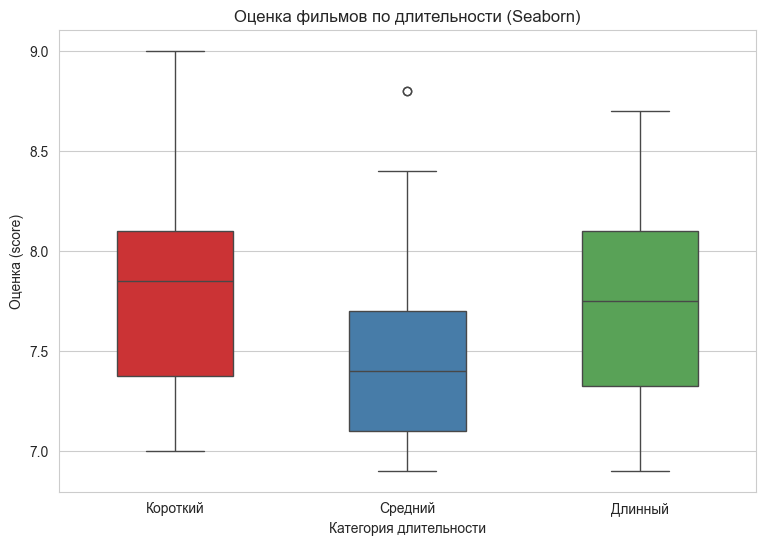

In [181]:
sns.set_style("whitegrid")

plt.figure(figsize=(9, 6))
sns.boxplot(
    x='duration_category',
    y='score',
    hue='duration_category',
    data=df_clean,
    palette="Set1",
    width=0.5
)
plt.title('Оценка фильмов по длительности (Seaborn)')
plt.xlabel('Категория длительности')
plt.ylabel('Оценка (score)')
plt.show()

Выводы:
* Короткие фильмы (<90 мин) имеют медианную оценку ~7.9, но с большим разбросом (есть высокие оценки до 9.0).
* Средние фильмы (90–150 мин) показывают наивысшую стабильность: медиана ~7.4, узкий межквартильный интервал.
* Длинные фильмы (>150 мин) демонстрируют поляризацию: много высоких оценок (медиана ~7.75), но и выбросы с низкими оценками (возможно, спорные арт-проекты).


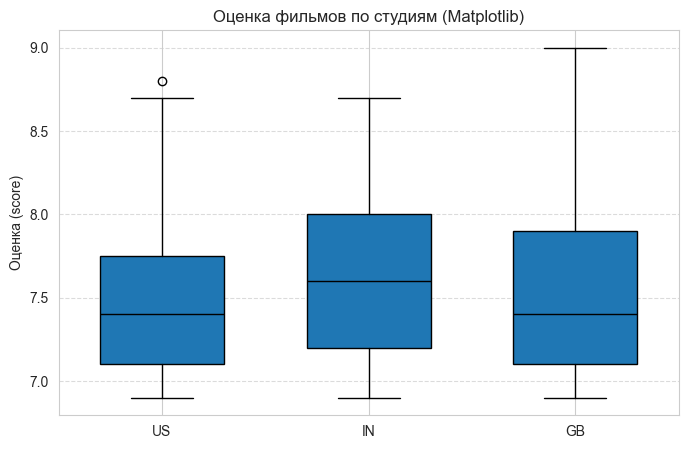

In [182]:
top_prods = df_clean['main_production'].value_counts().head(3).index
filtered_prod = df_clean[df_clean['main_production'].isin(top_prods)]

plt.figure(figsize=(8, 5))
data = [filtered_prod[filtered_prod['main_production'] == prod]['score']
        for prod in top_prods]
plt.boxplot(
    data,
    tick_labels=top_prods,
    patch_artist=True,
    medianprops=dict(color="black"),
    widths=0.6
)
plt.title('Оценка фильмов по студиям (Matplotlib)')
plt.ylabel('Оценка (score)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Выводы:**

**Медианные оценки**
* Студия IN демонстрирует наивысшую медианную оценку (~7.6), что указывает на систематически более высокое качество фильмов по сравнению с другими студиями.
* У студий US и GB медианы практически совпадают (~7.4), но при этом их распределения имеют разные особенности.

**Стабильность оценок**
* US показывает самый узкий межквартильный размах (ящик от ~7.1 до 7.7), что свидетельствует о высокой стабильности качества фильмов. Однако верхний ус ограничен (максимум ~8.7), что указывает на отсутствие «прорывных» проектов.
* IN имеет более широкий размах (ящик от ~7.2 до 8.0), но при этом fewer выбросов, что говорит о балансе между вариативностью и стабильностью.
* GB обладает наибольшей вариативностью: длинный верхний ус и выброс с оценкой 9.0, что указывает на наличие отдельных выдающихся проектов, но также на нестабильность общего качества.

**Экстремальные значения**
* У GB наблюдается максимальная оценка (9.0), что может соответствовать культовым или критически acclaimed фильмам.
* У US есть один выброс в верхней части (~8.8), но он менее выражен, чем у GB.
* Все студии имеют схожие минимальные оценки (нижние усы на уровне ~7.0), что говорит об отсутствии массовых «провалов».

**Стратегические различия**
* IN фокусируется на стабильно качественном контенте, возможно, с акцентом на нишевые или авторские проекты.
* GB рискует, выпуская как средние, так и «высококачественные» фильмы, что может быть связано с экспериментами в жанрах или режиссёрских решениях.
* US придерживается консервативной стратегии, делая ставку на предсказуемый и коммерчески успешный контент.

## 10. Выводы по работе

В данной лабораторной работе выполнен исследовательский анализ набора данных `movies2.csv` в соответствии с заданием варианта 5.

Ключевые находки:
1. Датасет содержит достаточное количество записей для выполнения базовой разведки данных. Наблюдаются региональные и жанровые особенности производства фильмов в период после 2020 года: некоторые производства (страны/студии) выпус
кают преимущественно фильмы определённых жанров, что видно по доминирующим столбцам на соответствующей диаграмме.
2. Среднее количество голосов на фильм имеет тенденцию к изменению во времени (годы >2010). Наблюдается рост средней активности по голосам в ряде годов, что может отражать увеличение активности зрителей на цифровых платформах или влияние отдельных крупных релизов (выбросов).
3. Корреляционный анализ между рейтингом (score), количеством голосов и длительностью фильма показал отсутствие сильной линейной связи между всеми признаками одновременно. Количество голосов чаще коррелирует с видимой популярностью, но не всегда с более высокими оценками.
4. Разбиение фильмов по категориям популярности (по числу голосов) показывает, что средние рейтинги в разных категориях близки, однако разброс оценок выше в категории «High», что указывает на больший разброс мнений у наиболее популярных релизов.
5. Качество данных в целом приемлемое: были удалены явные дубликаты и строки с отсутствующими ключевыми полями. Тем не менее имеются отдельные пропуски в вспомогательных колонках (runtime, score), которые стоит учитывать при моделировании.

Рекомендации для дальнейшей работы:
- При необходимости построения предсказательных моделей рекомендуется дополнительно обработать выбросы по числу голосов (логарифмирование) и заполнить/удалить редкие пропуски в `score` и `runtime`.
- Для глубинного анализа жанровых трендов можно провести кластеризацию по текстовым и числовым признакам и изучить временную динамику для каждой кластеры.
- При анализе влияния производства и страны можно объединить мелкие производства в категорию «Other», чтобы уменьшить число категорий и повысить интерпретируемость графиков.

